Plotting training data...


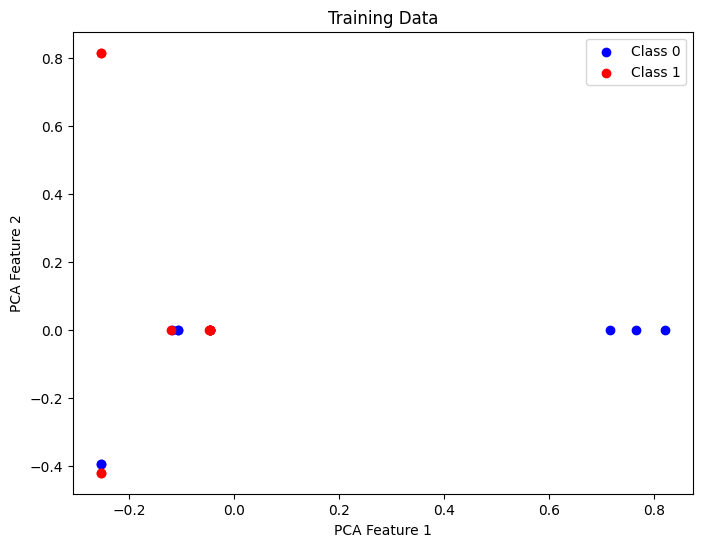

Classifying with k=3...


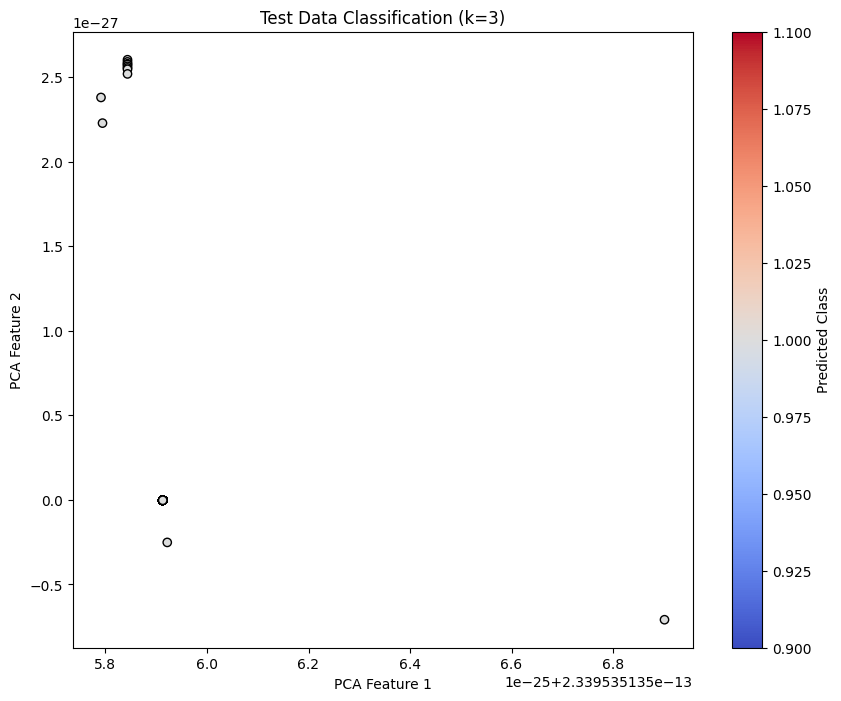

Classifying with k=1...


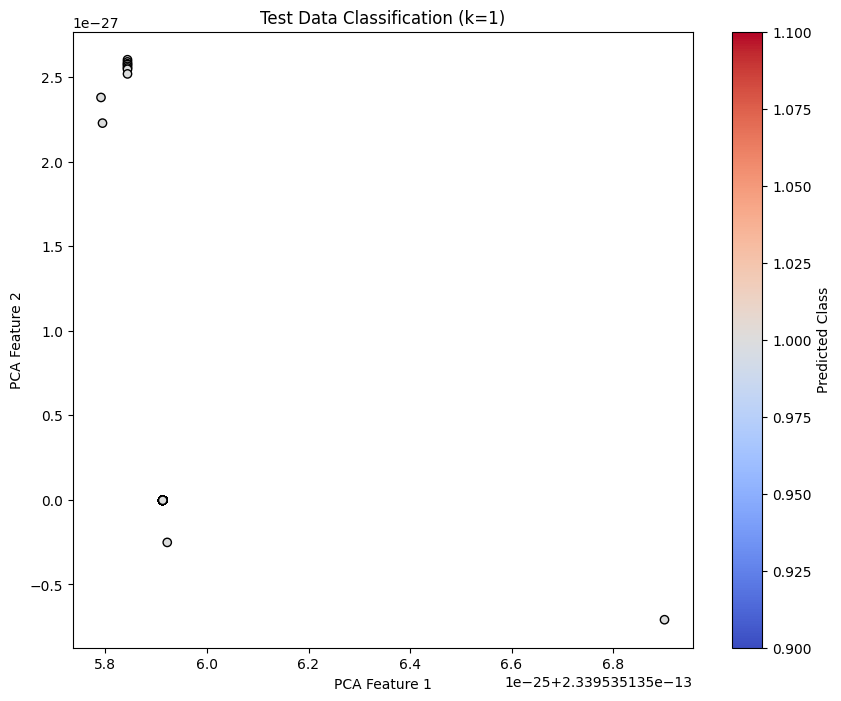

Classifying with k=5...


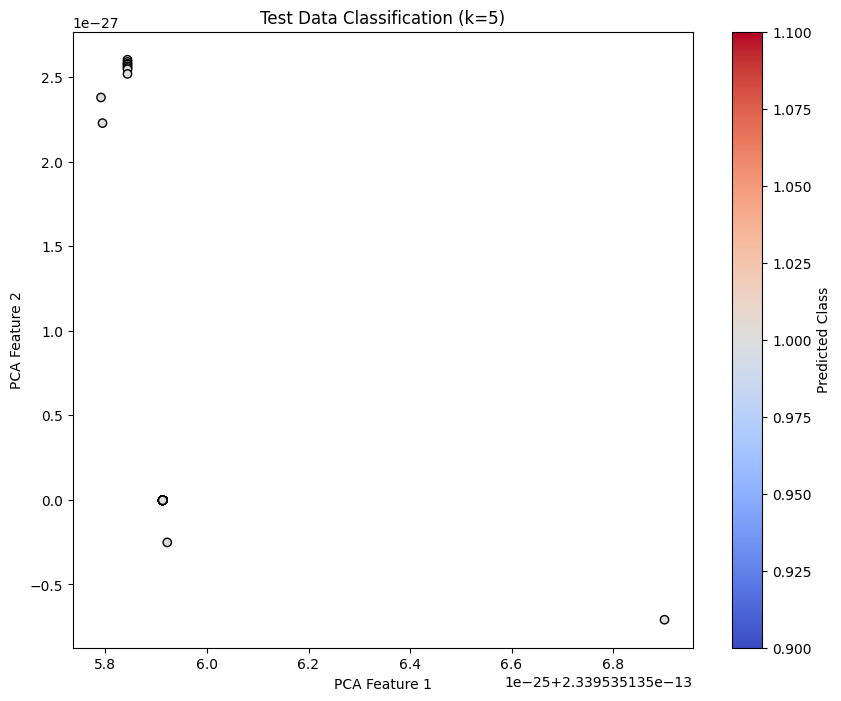

Classifying with k=7...


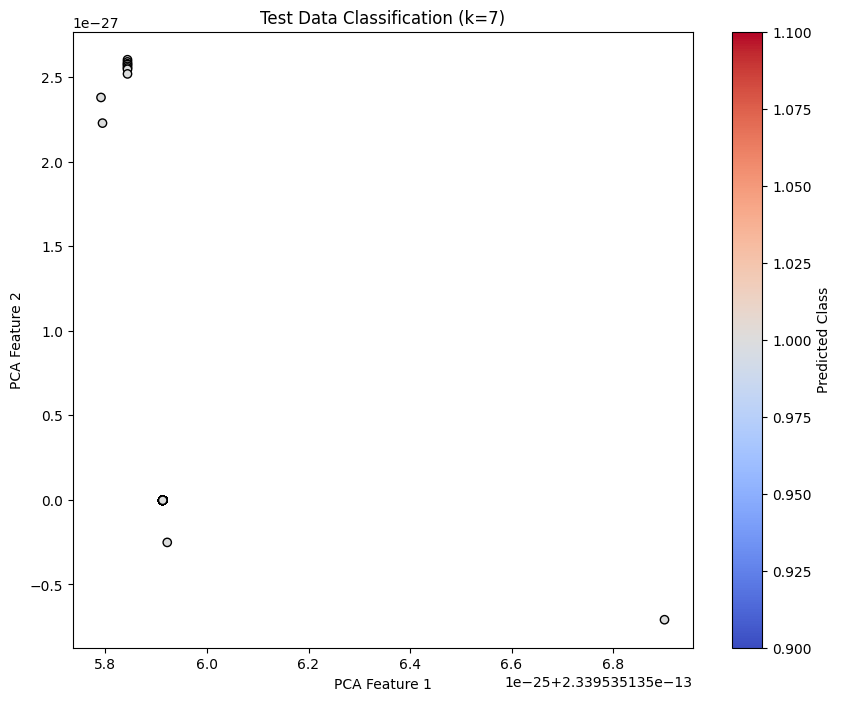

Classifying with k=9...


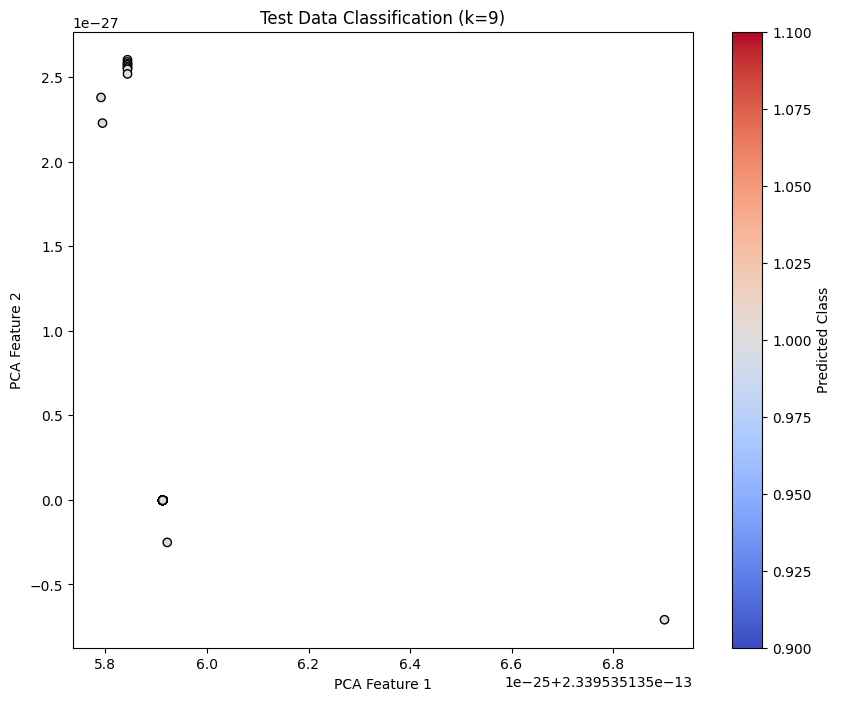

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_and_prepare_data():
    # Load the dataset
    df = pd.read_excel('Book1.xlsx')
    # Combine English and Hindi text into a single corpus
    corpus = df['ENGLISH'] + " " + df['HINDI']
    return corpus

def preprocess_data(corpus):
    # Convert combined text data to TF-IDF features
    vectorizer = TfidfVectorizer()
    X_combined = vectorizer.fit_transform(corpus).toarray()
    return X_combined, vectorizer

def plot_training_data(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='Class 1')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title('Training Data')
    plt.legend()
    plt.show()

def generate_test_data(vectorizer):
    # Create synthetic English and Hindi text data for testing
    test_english = ['test'] * 10000
    test_hindi = ['परीक्षण'] * 10000
    test_corpus = [te + " " + th for te, th in zip(test_english, test_hindi)]
    # Transform test data into the same TF-IDF space as the training data
    X_test_combined = vectorizer.transform(test_corpus).toarray()
    return X_test_combined

def classify_and_plot(X_train, y_train, X_test, k):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test_scaled)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'Test Data Classification (k={k})')
    plt.colorbar(label='Predicted Class')
    plt.show()

def main():
    # Load and preprocess the data
    corpus = load_and_prepare_data()
    X_vectorized, vectorizer = preprocess_data(corpus)

    # Create target labels for the first 20 samples
    y = np.array([0]*10 + [1]*10)  # Arbitrary classes for simplicity

    # Plot training data
    print("Plotting training data...")
    plot_training_data(X_vectorized[:20], y)

    # Generate and classify test data
    X_test = generate_test_data(vectorizer)
    print("Classifying with k=3...")
    classify_and_plot(X_vectorized[:20], y, X_test, k=3)

    # Repeat for various values of k
    for k in [1, 5, 7, 9]:
        print(f"Classifying with k={k}...")
        classify_and_plot(X_vectorized[:20], y, X_test, k=k)

if __name__ == "__main__":
    main()
